# Calibrate Cameras
[https://github.com/jayrambhia/Vision/blob/master/OpenCV/C%2B%2B/stereocalibrate.cpp](https://github.com/jayrambhia/Vision/blob/master/OpenCV/C%2B%2B/stereocalibrate.cpp)

In [1]:
from models.dataset.dataset_container import DatasetContainer
from _old.calibration.calibration import StereoCalibration
from matplotlib import pyplot as plt
from pathlib import Path
import cv2

In [10]:
resource_path = Path("../../../resources")

class Args:
    uncalibrated_dataset_path = resource_path / Path("images/uncalibrated/c_dataset_small_near.npz")
    calibration_file_path = resource_path / Path("calibrations/calibration_dataset.yml")
    common_points_threshold = 20
    alpha = 0.6 # 0 => calibrated images wont contain 'black' spaces, 1 => no pixels lost, -1 => auto
    save = False
args = Args()

## Actual Calibration

Opened dataset containing 13 image sets


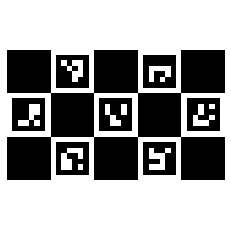

In [5]:
import matplotlib as mpl
dataset_container = DatasetContainer()
dataset_container.load_from_dataset(args.uncalibrated_dataset_path)

print(f"Opened dataset containing {dataset_container.size()} image sets")

# charuco board configuration
charuco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50) 
charuco_board = cv2.aruco.CharucoBoard_create(5, 3, 4.5, 3.375, charuco_dict)

# print board layout
imboard = charuco_board.draw((500, 500))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(imboard, cmap = mpl.cm.gray, interpolation = "nearest")
ax.axis("off")
plt.show()


In [11]:

# get extrinsic transformation between both cameras
calibration = StereoCalibration()
calibration.configure(
    charuco_dict=charuco_dict, 
    charuco_board=charuco_board, 
    common_points_threshold=args.common_points_threshold, 
    imgs_1=dataset_container.realsense.rgb,
    imgs_1_cm=dataset_container.realsense.camera_matrix,
    imgs_1_dc=dataset_container.realsense.distortion_coefficients,
    imgs_2=dataset_container.zivid.rgb,
    imgs_2_cm=dataset_container.zivid.camera_matrix,
    imgs_2_dc=dataset_container.zivid.distortion_coefficients,
    alpha=args.alpha,
    silent=True
)

# save calibration result
if args.save:
    calibration.save_calibration(args.calibration_file_path)


## Visualize

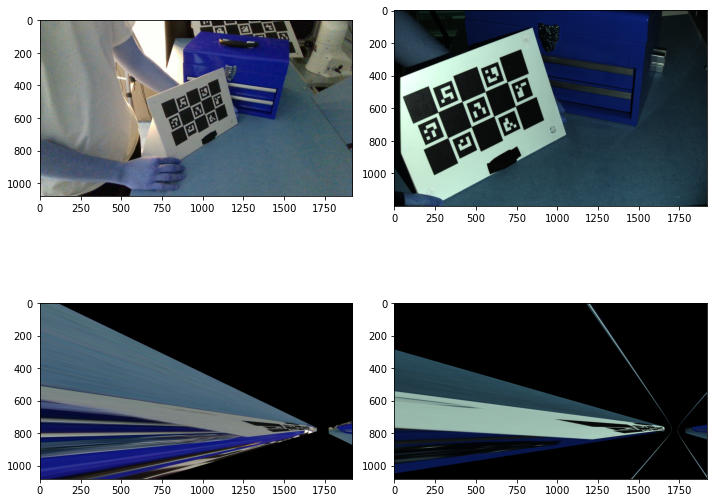

In [12]:
# visualize calibration result
idx = 2
img1, _, img2, _ = dataset_container[idx]
imgU1, imgU2 = calibration.remap(img1, img2)

f, axarr = plt.subplots(2, 2, figsize=(10, 8))
f.tight_layout()
axarr[0][0].imshow(img1)
axarr[0][1].imshow(img2)
axarr[1][0].imshow(imgU1)
axarr[1][1].imshow(imgU2)